In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
%pylab inline

from tqdm import tqdm
import jax
import jax.numpy as jnp
import numpy as np
# import tensorflow_probability as tfp; tfp = tfp.substrates.jax
# tfd = tfp.distributions
# tfb = tfp.bijectors

import torch
import jaxlie
import lietorch 
from gecco_torch.utils.isotropic_gaussian import IsotropicGaussianSO3
from gecco_torch.utils.isotropic_plotting import visualize_so3_probabilities, visualize_so3_density

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/giese/miniconda3/envs/gecco/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Create test distribution

In [3]:
@jax.jit
@jax.vmap
def sample_checkerboard(seed, size=np.pi):
    key1, key2, key3 = jax.random.split(seed, 3)
    x1 = jax.random.uniform(key=key1) * size - size/2
    x2_ = jax.random.uniform(key=key2) - jax.random.randint(minval=0, maxval=2,shape=[], key=key3) * 2
    x2 = x2_ + (jnp.floor(x1) % 2)
    data = jnp.stack([x1, x2]) * size/2
    Rs = jaxlie.SO3.from_rpy_radians(pitch=data[0]/2, yaw=data[1], roll=0).as_matrix()
    return Rs

In [4]:
# Create a checkerboard grid
Rs = sample_checkerboard(jax.random.split(jax.random.PRNGKey(0), 1024))
type(Rs)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


jaxlib.xla_extension.ArrayImpl

In [5]:
Rs.shape

(1024, 3, 3)

/home/giese/Documents/gecco/gecco-torch/src/gecco_torch/utils/isotropic_plotting.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


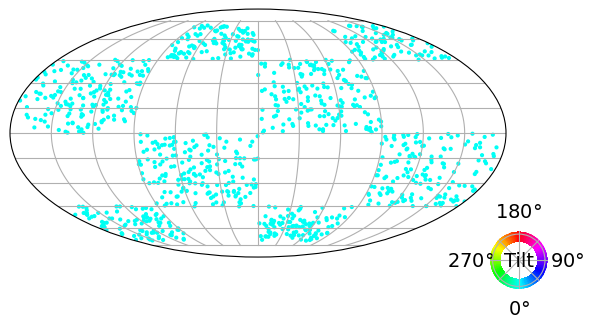

In [6]:
visualize_so3_probabilities(
    Rs,
    0.001);

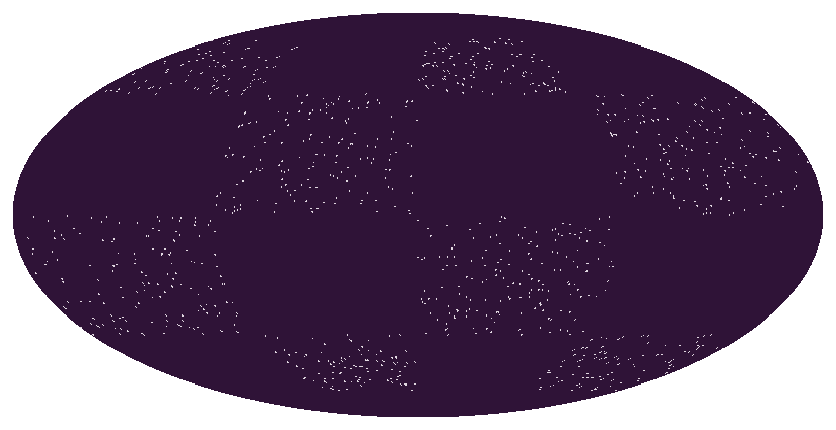

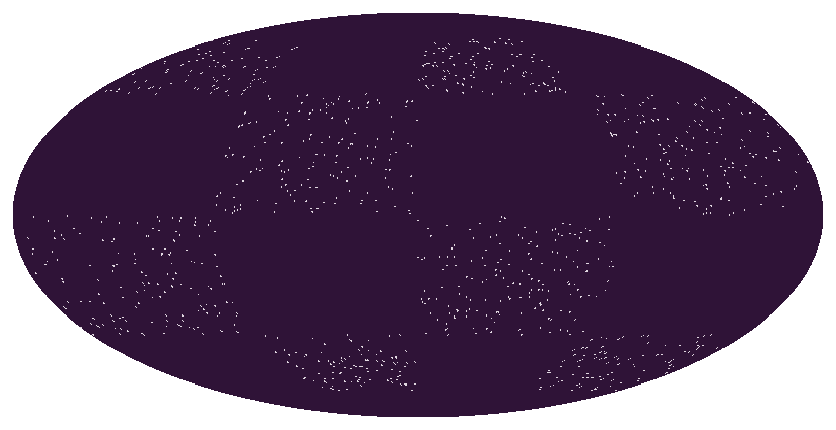

In [14]:
visualize_so3_density(
    Rs,
    100
)

In [7]:
unit_quats = torch.zeros((4000,4))
unit_quats[:,3] = 1
scales = torch.ones(4000)*0.001 # geht nur bis 0.001
ig = IsotropicGaussianSO3(unit_quats,scales)

/home/giese/miniconda3/envs/gecco/lib/python3.10/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'gecco_torch.utils.isotropic_gaussian.IsotropicGaussianSO3'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


In [8]:
samples = ig.sample()

/home/giese/Documents/gecco/gecco-torch/src/gecco_torch/utils/isotropic_plotting.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


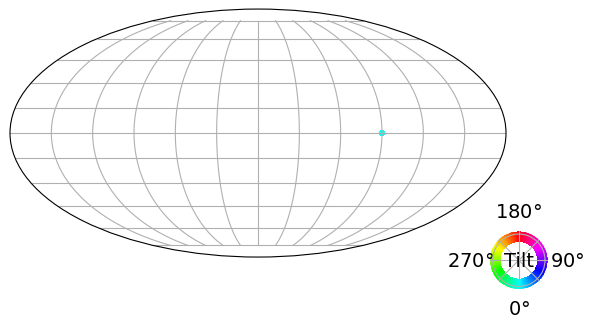

In [9]:
plot = visualize_so3_probabilities(
    lietorch.SO3(samples).matrix().cpu().numpy()[:,:3,:3],
    0.001);

In [10]:
# plots= []
# for i in range(1,1000):
#     unit_quats = torch.zeros((4000,4))
#     unit_quats[:,3] = 1
#     scales = torch.ones(4000)*i/1000
#     ig = IsotropicGaussianSO3(unit_quats,scales)
#     samples = ig.sample()
#     plot = visualize_so3_probabilities(
#         lietorch.SO3(samples).matrix().cpu().numpy()[:,:3,:3],
#         0.001);
#     plot.savefig(f'plots/plot_{i}.png')  # Saves each plot as an image

In [2]:
import cv2
import os

frame = cv2.imread('out/rot_1.png')
height, width, layers = frame.shape
video = cv2.VideoWriter('out/video.avi', cv2.VideoWriter_fourcc(*'DIVX'), 10, (width, height))

for i in range(0, 128):
    video.write(cv2.imread(f'out/rot_{i}.png'))

# cv2.destroyAllWindows()
video.release()

In [ ]:
from IPython.display import Video

Video("plots/video.avi")

In [ ]:
print(os.listdir())